In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [2]:
def synthetic_data(w,b,num_examples):
    """生成 y = Xw + b + 噪音。"""
    X = torch.normal(0,1, (num_examples, len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal (0, 0.01, y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:' ,labels[0])

features: tensor([ 0.2466, -0.5176]) 
label: tensor([6.4511])


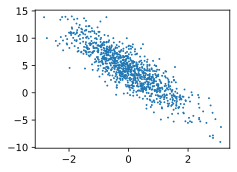

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(), labels.detach().numpy(),1);

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    # 随机读取的样本
    random.shuffle(indices)
    for i in range (0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print (X, '\n', y)
    break

tensor([[ 0.0618, -0.1962],
        [-0.2434,  1.4855],
        [ 1.7369,  1.0289],
        [ 1.7165, -1.2349],
        [-1.0386, -0.2488],
        [ 1.1068, -0.0797],
        [ 1.1412,  0.8961],
        [-0.9556, -1.4091],
        [ 0.4304, -1.1942],
        [-0.8639, -0.2881]]) 
 tensor([[ 4.9977],
        [-1.3427],
        [ 4.2027],
        [11.8413],
        [ 2.9769],
        [ 6.7004],
        [ 3.4459],
        [ 7.0856],
        [ 9.1241],
        [ 3.4428]])


In [6]:
w = torch.normal( 0,0.01, size =(2,1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

In [7]:
def linreg (X, w, b):
    """ 线性回归模型，linear regression """
    return torch.matmul (X, w) + b

In [8]:
def squared_loss(y_hat, y):
    """ 均方损失。 """
    return (y_hat - y.reshape(y_hat.shape)) ** 2 /2

In [9]:
def sgd(params , lr, batch_size):
    """ 小批量随机梯度下降。 """
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad/ batch_size
            param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X 和 y 的小批量损失
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_l = loss (net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss: {float( train_l .mean()):f}')

epoch 1, loss: 0.040555
epoch 2, loss: 0.000151
epoch 3, loss: 0.000050


In [12]:
print(f'w的估计误差：{true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差：tensor([ 0.0003, -0.0012], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0007], grad_fn=<RsubBackward1>)
